<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/OR%EA%B2%8C%EC%9D%B4%ED%8A%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OR 게이트 구현해보기 0,0-> 0 1,0->1 0,1-> 1 1,1->1

데이터 준비하기

In [2]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

In [21]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]]) #OR 연산 학습 데이터
label =np.array([[0],[1],[1],[1]]) # 정답 OR 연산

모델 구성하기

In [22]:
model = Sequential()  #신경망을 순서대로 쌓을거다
model.add(Dense(1,input_shape=(2,),activation='linear')) # 단층 퍼셉트론을 구성
 

모델 설정하기

In [23]:
model.compile(optimizer=SGD(), loss= mse, metrics=['acc'])

In [24]:
# 모델확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


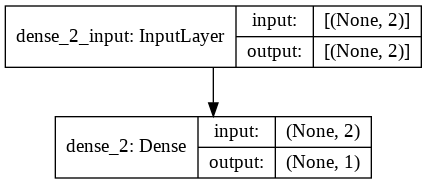

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습시키기

In [30]:
history =model.fit(data,label, epochs=888) # 학습데이터, 정답, 공부 횟수

Epoch 1/888
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - acc: 1.0000
Epoch 2/888
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - acc: 1.0000
Epoch 3/888
1/1 [==============================] - 0s 7ms/step - loss: 0.0625 - acc: 1.0000
Epoch 4/888
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - acc: 1.0000
Epoch 5/888
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - acc: 1.0000
Epoch 6/888
1/1 [==============================] - 0s 7ms/step - loss: 0.0625 - acc: 1.0000
Epoch 7/888
1/1 [==============================] - 0s 6ms/step - loss: 0.0625 - acc: 1.0000
Epoch 8/888
1/1 [==============================] - 0s 6ms/step - loss: 0.0625 - acc: 1.0000
Epoch 9/888
1/1 [==============================] - 0s 9ms/step - loss: 0.0625 - acc: 1.0000
Epoch 10/888
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - acc: 1.0000
Epoch 11/888
1/1 [==============================] - 0s 8ms/step - loss: 0.0625 

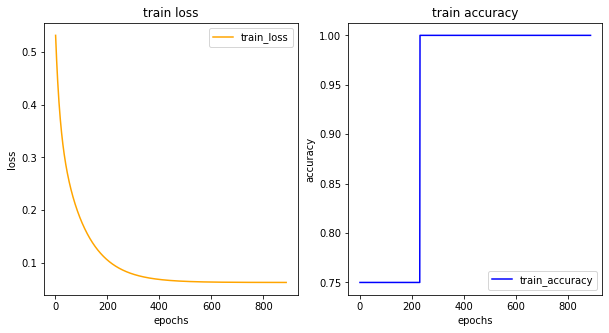

In [27]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


모델 가중치 확인

In [28]:
model.get_weights()

[array([[0.509776  ],
        [0.49130163]], dtype=float32), array([0.24936089], dtype=float32)]

모델 예측하기

In [29]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [1]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
